<a href="https://colab.research.google.com/github/vshnu07/img_classifier/blob/main/img_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opencv-python scikit-learn matplotlib numpy scikit-image tqdm


train data shape: (60000, 28, 28)
train label shape: (60000,)
test data shape: (10000, 28, 28)
test label shape: (10000,)


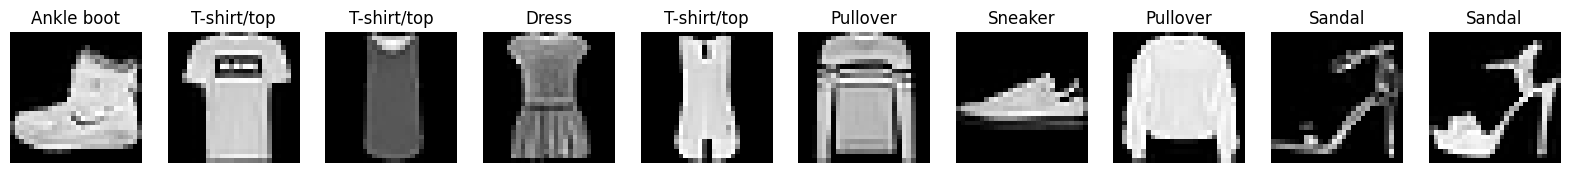

After reshape: (60000, 28, 28, 1) (10000, 28, 28, 1)


Extracting HOG: 100%|██████████| 10000/10000 [00:09<00:00, 1048.77it/s]


HOG train shape: (60000, 1296)
HOG test shape: (10000, 1296)
Training SVM...
Train Accuracy: 93.34%
Test Accuracy: 88.84%


In [5]:


# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f'train data shape: {X_train.shape}')
print(f'train label shape: {y_train.shape}')
print(f'test data shape: {X_test.shape}')
print(f'test label shape: {y_test.shape}')

# Plot initial 10 images
def plot_initial_images(images, labels, class_names):
    fig, axes = plt.subplots(1, 10, figsize=(20, 3))
    for i in range(10):
        ax = axes[i]
        ax.imshow(images[i], cmap='gray')
        ax.set_title(class_names[labels[i]])
        ax.axis('off')
    plt.show()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plot_initial_images(X_train, y_train, class_names)

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("After reshape:", X_train.shape, X_test.shape)

# Extract HOG features
def extract_hog_features(images):
    hog_features = []
    for image in tqdm(images, desc="Extracting HOG"):
        image = np.squeeze(image)
        features = hog(image,
                       pixels_per_cell=(4, 4),
                       cells_per_block=(2, 2),
                       orientations=9,
                       visualize=False,
                       channel_axis=None)
        hog_features.append(features)
    return np.array(hog_features)

# extraction on all images
hog_features_train = extract_hog_features(X_train)
hog_features_test = extract_hog_features(X_test)

print("HOG train shape:", hog_features_train.shape)
print("HOG test shape:", hog_features_test.shape)

# Train SVM
print("Training SVM...")
svm = SVC(kernel='linear')
svm.fit(hog_features_train, y_train)

# Evaluate
train_accuracy = svm.score(hog_features_train, y_train)
test_accuracy = svm.score(hog_features_test, y_test)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


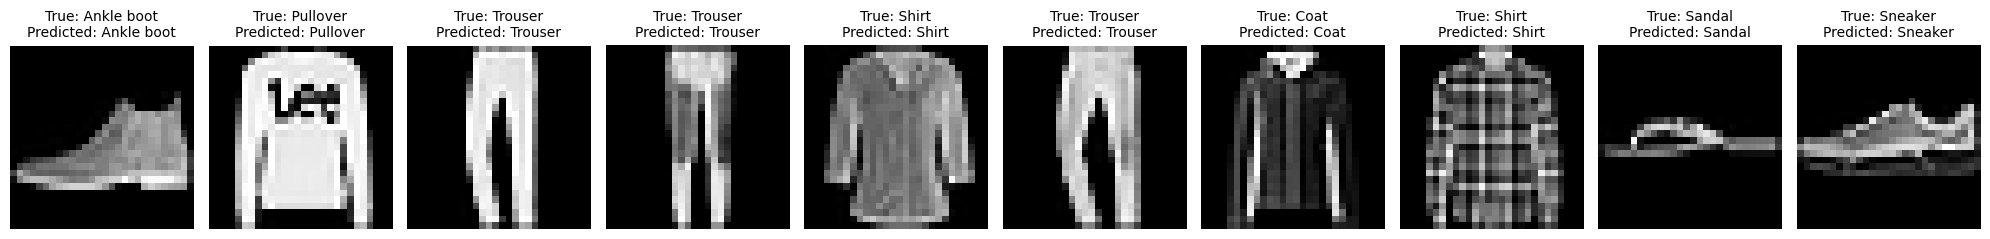

In [6]:
#prediction on test set
y_predict=svm.predict(hog_features_test)

def plot_output_images(images,true_labels,predicted_labels,class_names):
  fig,axes=plt.subplots(1,10,figsize=(20,3))
  for i in range(10):
    ax=axes[i]
    ax.imshow(images[i].reshape(28,28),cmap='gray')
    ax.set_title(f"True: {class_names[true_labels[i]]}\nPredicted: {class_names[predicted_labels[i]]}",fontsize=10)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

plot_output_images(X_test[:10],y_test[:10],y_predict[:10],class_names)